# Data exploration

<img src="../images/01.jpg" width="600"/>

Acceso rápido:
- [Tablas con totales y % de Baja en variables categóricas](#Tablas)
- [Estudio de Correlación](#Correlacion)
- [Consumo por `Tipo Inmueble`](#Consumo)
- [Filtrado de una comunidad para MVP](#Filtrado)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tools import dataoveriew, heat_map

pd.options.display.max_columns = None

%matplotlib inline

In [2]:
data = pd.read_excel('../data/portfolio.xlsx')
data.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes
0,2014-01-01,1,Biasi,Granada,Hombre,España,1959-09-02,Propiedad Parcial,Trabajo Fijo,Casado,2000,13,2018-06-29,BAJA,Casa,Financiado,Promo 0 EUR,399,NaN,0,622.81
1,2014-01-01,2,Biasi,Barcelona,Mujer,España,1971-04-15,Familiar,Parado,Divorciado,600,12,2014-01-01,ACTIVO,Piso,Financiado,0 - 100 EUR,399,12.0,4,42.40
2,2014-01-01,3,Biasi,Madrid,Hombre,España,1968-02-10,Propiedad Total,Trabajo Fijo,Divorciado,2500,14,2014-01-01,ACTIVO,Piso,Financiado,100 - 200 EUR,499,NaN,0,68.34
3,2014-01-01,4,Biasi,Sevilla,Mujer,España,1968-12-22,Propiedad Parcial,Autonomo,Casado,1800,12,2014-01-01,ACTIVO,Casa,Financiado,0 - 100 EUR,399,2.0,0,304.10
4,2014-01-01,5,Biasi,Barcelona,Hombre,España,1977-02-22,Propiedad Parcial,Autonomo,Casado,1500,12,2014-01-01,ACTIVO,Tienda,Financiado,100 - 200 EUR,499,NaN,0,84.33


In [3]:
data.shape

(482727, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482727 entries, 0 to 482726
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Fecha Alta         482727 non-null  datetime64[ns]
 1   Cliente            482727 non-null  int64         
 2   Modelo Caldera     482727 non-null  object        
 3   Provincia          482727 non-null  object        
 4   Gender             482727 non-null  object        
 5   Pais               482727 non-null  object        
 6   Born Date          480983 non-null  datetime64[ns]
 7   Tipo Propiedad     482727 non-null  object        
 8   Situacion Laboral  482727 non-null  object        
 9   Estado Civil       482727 non-null  object        
 10  Ingresos           482727 non-null  int64         
 11  Pagos Anuales      482727 non-null  int64         
 12  Fecha Estado       482727 non-null  datetime64[ns]
 13  Estado             482727 non-null  object  

In [5]:
data.isnull().sum()

Fecha Alta                0
Cliente                   0
Modelo Caldera            0
Provincia                 0
Gender                    0
Pais                      0
Born Date              1744
Tipo Propiedad            0
Situacion Laboral         0
Estado Civil              0
Ingresos                  0
Pagos Anuales             0
Fecha Estado              0
Estado                    0
Tipo Inmueble             0
Financiado                0
Precio Contado            0
Precio Total              0
Quejas               391613
Incidencias               0
Consumo Mes               0
dtype: int64

In [6]:
dataoveriew(data, 'Overiew of the dataset')

Overiew of the dataset:

Número de Filas: 482727

Número de Columnas: 21

Columnas:

['Fecha Alta', 'Cliente', 'Modelo Caldera', 'Provincia', 'Gender', 'Pais', 'Born Date', 'Tipo Propiedad', 'Situacion Laboral', 'Estado Civil', 'Ingresos', 'Pagos Anuales', 'Fecha Estado', 'Estado', 'Tipo Inmueble', 'Financiado', 'Precio Contado', 'Precio Total', 'Quejas', 'Incidencias', 'Consumo Mes']

Valores nulos: 393357

Valores únicos:

Fecha Alta             2556
Cliente              482727
Modelo Caldera            2
Provincia                47
Gender                    2
Pais                      9
Born Date             28043
Tipo Propiedad            5
Situacion Laboral         6
Estado Civil              4
Ingresos               1749
Pagos Anuales             5
Fecha Estado           2598
Estado                    2
Tipo Inmueble             7
Financiado                2
Precio Contado            6
Precio Total             11
Quejas                   30
Incidencias              18
Consumo Mes

In [7]:
data['Estado'].unique()

array(['BAJA', 'ACTIVO'], dtype=object)

In [8]:
data['Quejas'] = data['Quejas'].replace(np.nan, 0).astype('int')
data['Cliente'] = data['Cliente'].astype('str')
data.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes
0,2014-01-01,1,Biasi,Granada,Hombre,España,1959-09-02,Propiedad Parcial,Trabajo Fijo,Casado,2000,13,2018-06-29,BAJA,Casa,Financiado,Promo 0 EUR,399,0,0,622.81
1,2014-01-01,2,Biasi,Barcelona,Mujer,España,1971-04-15,Familiar,Parado,Divorciado,600,12,2014-01-01,ACTIVO,Piso,Financiado,0 - 100 EUR,399,12,4,42.40
2,2014-01-01,3,Biasi,Madrid,Hombre,España,1968-02-10,Propiedad Total,Trabajo Fijo,Divorciado,2500,14,2014-01-01,ACTIVO,Piso,Financiado,100 - 200 EUR,499,0,0,68.34
3,2014-01-01,4,Biasi,Sevilla,Mujer,España,1968-12-22,Propiedad Parcial,Autonomo,Casado,1800,12,2014-01-01,ACTIVO,Casa,Financiado,0 - 100 EUR,399,2,0,304.10
4,2014-01-01,5,Biasi,Barcelona,Hombre,España,1977-02-22,Propiedad Parcial,Autonomo,Casado,1500,12,2014-01-01,ACTIVO,Tienda,Financiado,100 - 200 EUR,499,0,0,84.33


In [9]:
data.describe()

,Ingresos,Pagos Anuales,Precio Total,Quejas,Incidencias,Consumo Mes
count,4.827270e+05,482727.000000,482727.000000,482727.000000,482727.000000,482727.000000
mean,2.018051e+04,13.050855,507.101681,0.344930,0.905769,199.957833
std,3.832564e+06,1.081936,113.016836,0.980646,2.152210,131.338933
min,0.000000e+00,12.000000,199.000000,0.000000,0.000000,0.060000
25%,1.200000e+03,12.000000,399.000000,0.000000,0.000000,99.070000
50%,1.500000e+03,13.000000,499.000000,0.000000,0.000000,176.510000
75%,2.000000e+03,14.000000,599.000000,0.000000,0.000000,274.290000
max,1.600000e+09,16.000000,1199.000000,42.000000,17.000000,1260.350000


<div class="alert alert-block alert-warning">
<b>sns.pairplot:</b> Tiempo de ejecución alto
</div>

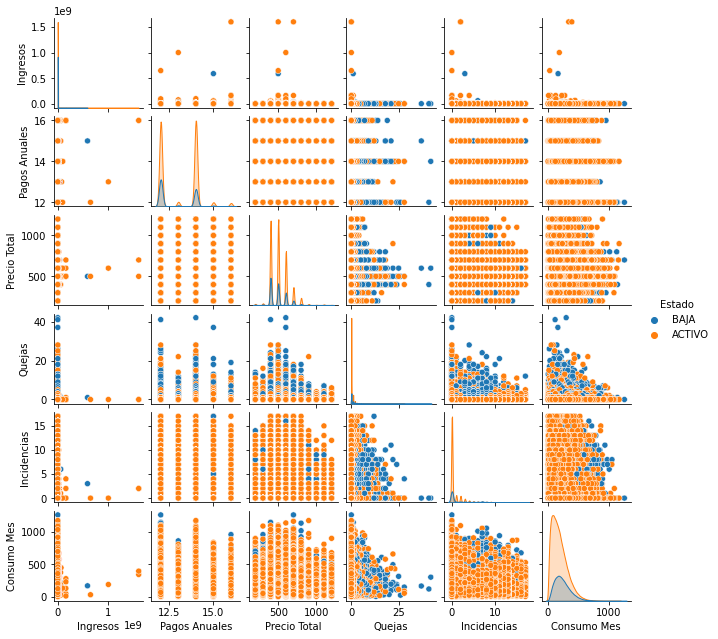

In [11]:
# sns.pairplot(data = data, diag_kind = 'kde', hue = 'Estado', height = 1.5);

A simple vista, se observan outliers en `Ingresos` y una correlación lineal directa entre `Quejas` y las bajas.  

**Histogramas** con las `Quejas`y las `Incidencias` segmentado por el `Estado` ya que, a priori deben ser 2 de las variables con mayor influencia sobre las bajas:

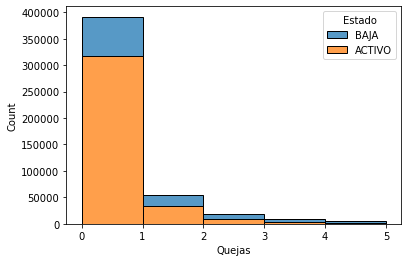

In [10]:
sns.histplot(data = data, x="Quejas", hue = 'Estado', binwidth=1,  binrange = (0,5), multiple="stack");

Haciendo zoom sobre los clientes entre 0 y 5 `Quejas` ya se observa que la proporción de bajas aumenta con las quejas.

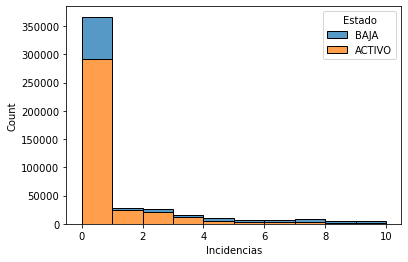

In [11]:
sns.histplot(data = data, x="Incidencias", hue = 'Estado', multiple="stack", binwidth=1, binrange = (0,10));

Lo mismo se aprecia al hacer zoom sobre los clientes entre 0 y 10 `Incidencias`.  

Proporción de **Baja VS Activo**:

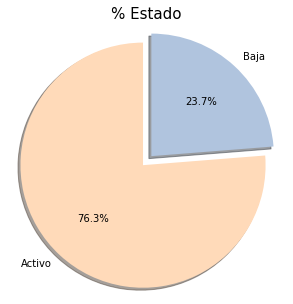

In [12]:
pesos = data.groupby(data['Estado'])['Estado'].count()
activos = pesos[0]/data['Estado'].count()*100
bajas = pesos[1]/data['Estado'].count()*100

labels = 'Activo', 'Baja'
sizes = [activos, bajas]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%', shadow=True, 
        startangle=90, colors =['peachpuff','lightsteelblue'])
ax1.axis('equal')
plt.title('% Estado', size = 15)

plt.show()

Las clases (Activo y Baja) están desbalanceadas.  

Plots para comprobar la relación entre los distintos valores de algunas de las variables categóricas con el `Estado`:

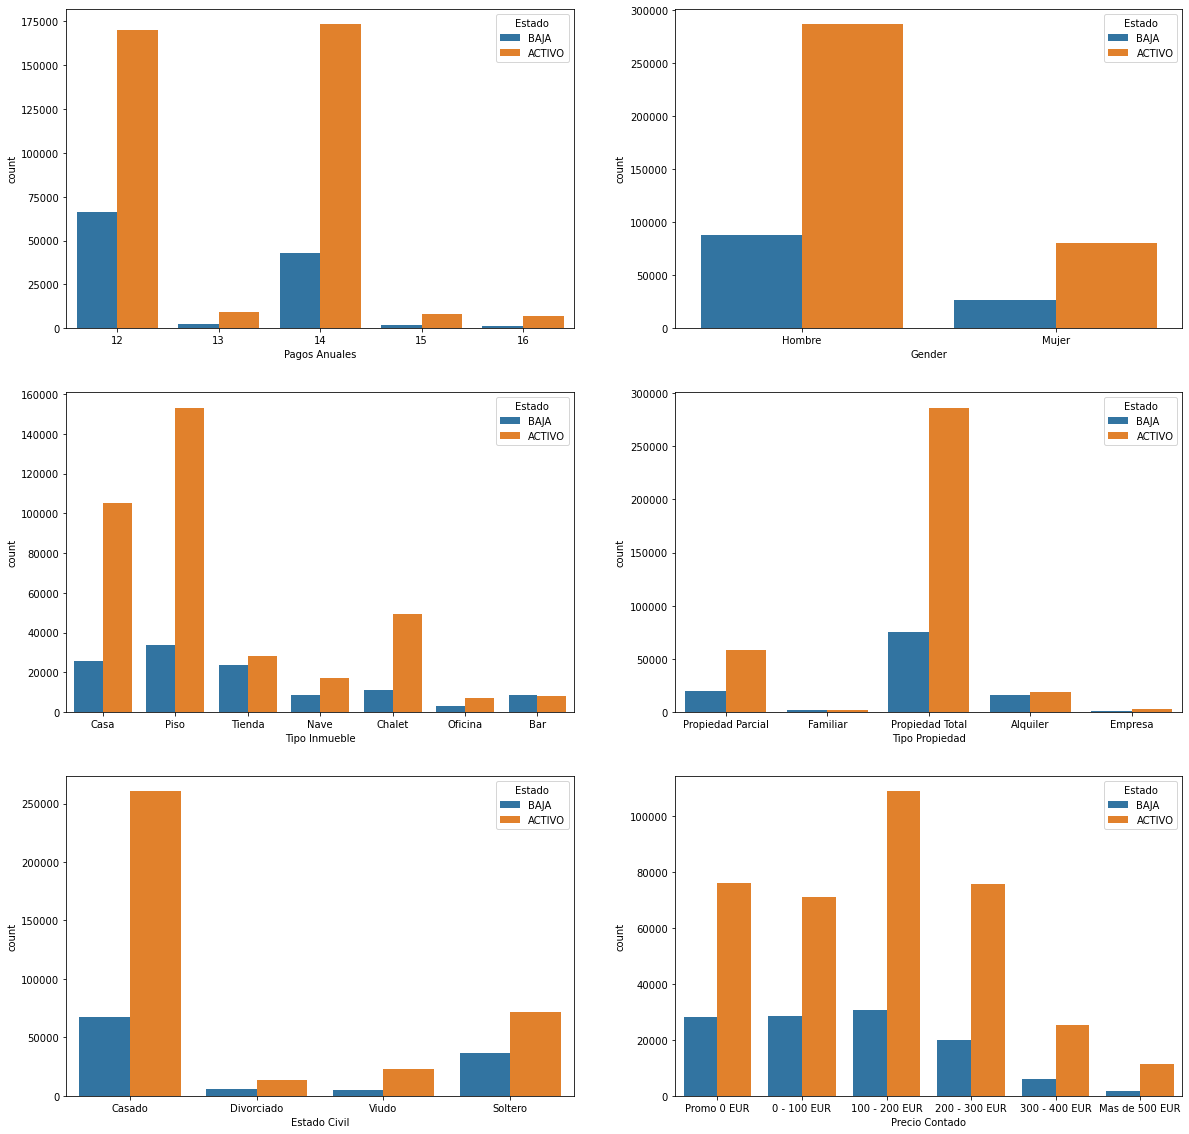

In [13]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 20))
sns.countplot(x='Pagos Anuales', hue = 'Estado',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Estado',data = data, ax=axarr[0][1])
sns.countplot(x='Tipo Inmueble', hue = 'Estado',data = data, ax=axarr[1][0])
sns.countplot(x='Tipo Propiedad', hue = 'Estado',data = data, ax=axarr[1][1])
sns.countplot(x='Estado Civil', hue = 'Estado',data = data, ax=axarr[2][0])
sns.countplot(x='Precio Contado', hue = 'Estado',data = data, ax=axarr[2][1])

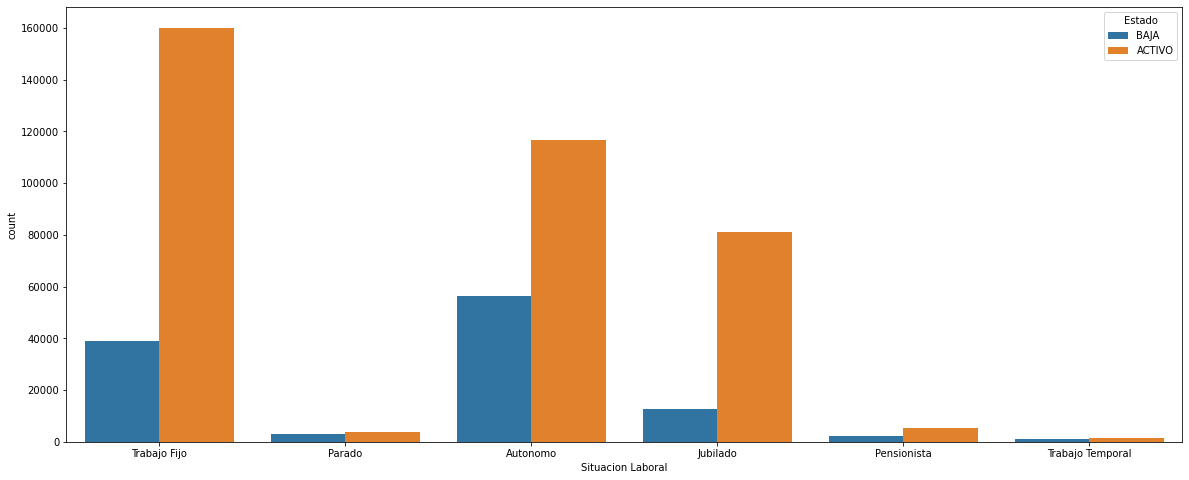

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax = sns.countplot(x='Situacion Laboral', hue = 'Estado',data = data)

Se puede comprobar que algunos de los valores tienen un % de bajas superior al resto como, por ejemplo, Bar o Tienda (Tipo Inmueble), Alquiler (Tipo Propiedad), 0 - 100 EUR (Precio Contado), Soltero (Estado Civil) y Autónomo (Situación Laboral).  

A continuación, se realiza el mismo ejercicio representando los valores en forma de tabla:

<a id='Tablas'></a>
### Tablas con totales y % de Baja en variables categóricas

In [22]:
tab1 = pd.crosstab(data["Pais"], data["Estado"], margins = True)
tab2 = pd.crosstab(data["Pais"], data["Estado"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Estado,ACTIVO,BAJA,All,ACTIVO,BAJA
Pais,,,,,
Africa,529,746,1275,0.414902,0.585098
Asia,1507,665,2172,0.693831,0.306169
Centro/Sur America,2285,2294,4579,0.499017,0.500983
España,345279,103015,448294,0.770207,0.229793
Europa,1567,649,2216,0.707130,0.292870
Norteamerica,290,52,342,0.847953,0.152047
Oceania,67,13,80,0.837500,0.162500
Otros,1891,1458,3349,0.564646,0.435354
Union Europea,14701,5719,20420,0.719931,0.280069


Los clientes con nacionalidades *África* y *Centro/Sur América* cuentan con mayor % de bajas que activos, aunque con escaso peso en el portfolio total.

In [23]:
tab1 = pd.crosstab(data["Modelo Caldera"], data["Estado"], margins = True)
tab2 = pd.crosstab(data["Modelo Caldera"], data["Estado"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Estado,ACTIVO,BAJA,All,ACTIVO,BAJA
Modelo Caldera,,,,,
Biasi,336486,89133,425619,0.790580,0.209420
Domusa,31630,25478,57108,0.553863,0.446137
All,368116,114611,482727,0.762576,0.237424


Aunque sí existen diferencias, se evitará utilizar la variable `Modelo Caldera` en los modelos ya que actualmente se instala casi en exclusiva las de la marca Biasi.

In [24]:
tab1 = pd.crosstab(data["Gender"], data["Estado"], margins = True)
tab2 = pd.crosstab(data["Gender"], data["Estado"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Estado,ACTIVO,BAJA,All,ACTIVO,BAJA
Gender,,,,,
Hombre,287235,87835,375070,0.765817,0.234183
Mujer,80881,26776,107657,0.751284,0.248716
All,368116,114611,482727,0.762576,0.237424


Apenas existe diferencia entre sexos, como ya se apreciaba en el countplot.

In [25]:
tab1 = pd.crosstab(data["Tipo Inmueble"], data["Estado"], margins = True)
tab2 = pd.crosstab(data["Tipo Inmueble"], data["Estado"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Estado,ACTIVO,BAJA,All,ACTIVO,BAJA
Tipo Inmueble,,,,,
Bar,7948,8561,16509,0.481434,0.518566
Casa,105243,25889,131132,0.802573,0.197427
Chalet,49391,11319,60710,0.813556,0.186444
Nave,16943,8456,25399,0.667074,0.332926
Oficina,7189,3111,10300,0.697961,0.302039
Piso,153208,33836,187044,0.819101,0.180899
Tienda,28194,23439,51633,0.546046,0.453954
All,368116,114611,482727,0.762576,0.237424


El % de bajas en **negocios** es superior que en domicilios particulares, en especial en *Bar* y *Tienda*.

In [26]:
tab1 = pd.crosstab(data["Situacion Laboral"], data["Estado"], margins = True)
tab2 = pd.crosstab(data["Situacion Laboral"], data["Estado"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Estado,ACTIVO,BAJA,All,ACTIVO,BAJA
Situacion Laboral,,,,,
Autonomo,116558,56217,172775,0.674623,0.325377
Jubilado,80964,12854,93818,0.862990,0.137010
Parado,3687,2958,6645,0.554853,0.445147
Pensionista,5316,2201,7517,0.707197,0.292803
Trabajo Fijo,160086,39150,199236,0.803499,0.196501
Trabajo Temporal,1505,1231,2736,0.550073,0.449927
All,368116,114611,482727,0.762576,0.237424


La situación laboral *Autónomo* está relacionada con el tipo de inmueble, ya que suele ser la situación laboral del propietario de gran parte de las tiendas y los bares.

In [27]:
tab1 = pd.crosstab(data["Estado Civil"], data["Estado"], margins = True)
tab2 = pd.crosstab(data["Estado Civil"], data["Estado"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Estado,ACTIVO,BAJA,All,ACTIVO,BAJA
Estado Civil,,,,,
Casado,260467,67678,328145,0.793756,0.206244
Divorciado,13161,5857,19018,0.692029,0.307971
Soltero,71835,36235,108070,0.664708,0.335292
Viudo,22653,4841,27494,0.823925,0.176075
All,368116,114611,482727,0.762576,0.237424


Mayor % de baja entre clientes con estado civil registrado como *Soltero* y *Divorciado*, al ser unidades familiares teóricamente más inestables.

In [28]:
tab1 = pd.crosstab(data["Pagos Anuales"], data["Estado"], margins = True)
tab2 = pd.crosstab(data["Pagos Anuales"], data["Estado"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Estado,ACTIVO,BAJA,All,ACTIVO,BAJA
Pagos Anuales,,,,,
12,170212,66197,236409,0.719990,0.280010
13,9290,2495,11785,0.788290,0.211710
14,173447,42713,216160,0.802401,0.197599
15,8332,1989,10321,0.807286,0.192714
16,6835,1217,8052,0.848857,0.151143
All,368116,114611,482727,0.762576,0.237424


Cuantos menos pagos y, por tanto, mayores sean las cuotas, el % de baja aumenta, como se constata entre los clientes que tienen configurada su factura en 12 y 14 pagos anuales, modalidades en la que se encuentra más del 90% de las observaciones del dataset.

In [29]:
tab1 = pd.crosstab(data["Financiado"], data["Estado"], margins = True)
tab2 = pd.crosstab(data["Financiado"], data["Estado"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Estado,ACTIVO,BAJA,All,ACTIVO,BAJA
Financiado,,,,,
Contado,2323,539,2862,0.811670,0.188330
Financiado,365793,114072,479865,0.762283,0.237717
All,368116,114611,482727,0.762576,0.237424


Sin diferencias significativas entre clientes que deciden pagar la caldera al contado o financiando su coste.

In [30]:
tab1 = pd.crosstab(data["Precio Contado"], data["Estado"], margins = True)
tab2 = pd.crosstab(data["Precio Contado"], data["Estado"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Estado,ACTIVO,BAJA,All,ACTIVO,BAJA
Precio Contado,,,,,
0 - 100 EUR,71162,28415,99577,0.714643,0.285357
100 - 200 EUR,108804,30641,139445,0.780265,0.219735
200 - 300 EUR,75637,19909,95546,0.791629,0.208371
300 - 400 EUR,25172,5980,31152,0.808038,0.191962
Mas de 500 EUR,11312,1676,12988,0.870958,0.129042
Promo 0 EUR,76029,27990,104019,0.730915,0.269085
All,368116,114611,482727,0.762576,0.237424


Atendiendo al precio inicial al contado que se paga por la caldera, la proporción de bajas es mayor entre quienes obtienen una oferta mayor. La razón es que quien necesita realmente o está más convencido de contratar el servcio está dispuesto a pagar un importe mayor.

In [31]:
tab1 = pd.crosstab(data["Precio Total"], data["Estado"], margins = True)
tab2 = pd.crosstab(data["Precio Total"], data["Estado"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Estado,ACTIVO,BAJA,All,ACTIVO,BAJA
Precio Total,,,,,
199,1610,538,2148,0.749534,0.250466
299,2452,907,3359,0.729979,0.270021
399,121106,46146,167252,0.724093,0.275907
499,124122,36255,160377,0.773939,0.226061
599,79273,21067,100340,0.790044,0.209956
699,26439,7674,34113,0.775042,0.224958
799,10519,1633,12152,0.865619,0.134381
899,1423,223,1646,0.864520,0.135480
999,262,32,294,0.891156,0.108844


Lo mismo que con el pago inicial sucede con el precio total de la caldera.

<a id='Correlacion'></a>
### Estudio de Correlación

Se transforman las clases del `Estado` a 0 y 1 para poder obtener la correlación lineal con el resto de variables numéricas.

In [10]:
data['Estado'] = data['Estado'].astype('str').str.strip()
data['Estado'] = data['Estado'].replace({'ACTIVO': 0, 'BAJA': 1}).astype(int)
data.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes
0,2014-01-01,1,Biasi,Granada,Hombre,España,1959-09-02,Propiedad Parcial,Trabajo Fijo,Casado,2000,13,2018-06-29,1,Casa,Financiado,Promo 0 EUR,399,0,0,622.81
1,2014-01-01,2,Biasi,Barcelona,Mujer,España,1971-04-15,Familiar,Parado,Divorciado,600,12,2014-01-01,0,Piso,Financiado,0 - 100 EUR,399,12,4,42.40
2,2014-01-01,3,Biasi,Madrid,Hombre,España,1968-02-10,Propiedad Total,Trabajo Fijo,Divorciado,2500,14,2014-01-01,0,Piso,Financiado,100 - 200 EUR,499,0,0,68.34
3,2014-01-01,4,Biasi,Sevilla,Mujer,España,1968-12-22,Propiedad Parcial,Autonomo,Casado,1800,12,2014-01-01,0,Casa,Financiado,0 - 100 EUR,399,2,0,304.10
4,2014-01-01,5,Biasi,Barcelona,Hombre,España,1977-02-22,Propiedad Parcial,Autonomo,Casado,1500,12,2014-01-01,0,Tienda,Financiado,100 - 200 EUR,499,0,0,84.33


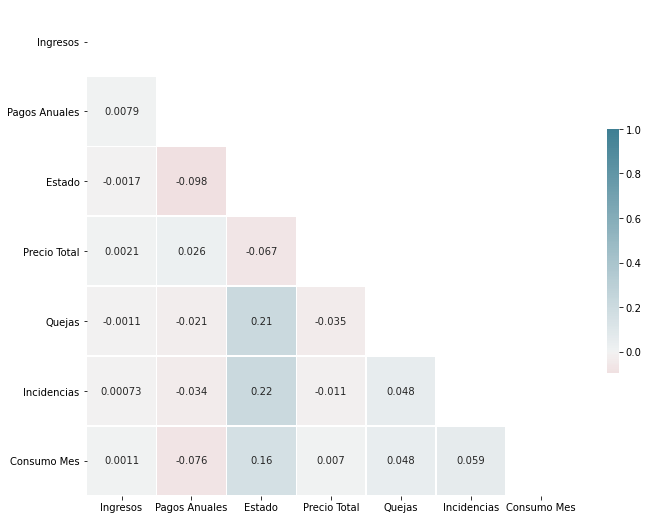

In [11]:
heat_map(data)

Como eran de esperar, las variables `Quejas` e `Incidencias` están correlacionadas con las bajas.  

También lo está `Consumo Mes`, que en el siguiente apartado se desarrolla más en profundidad.

<a id='Consumo'></a>
### Consumo por `Tipo Inmueble`

La función de distribución (sin segmentar) del consumo de las bajas está más desplazada hacia la derecha como se representa en los 2 siguiente gráficos, lo que indica que, en general, el consumo suele ser más elevado en las bajas:

Estado
0    188.000731
1    238.362527
Name: Consumo Mes, dtype: float64


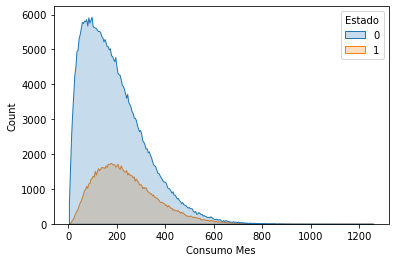

In [18]:
print(data.groupby(['Estado'])['Consumo Mes'].mean())
sns.histplot(data, x="Consumo Mes", hue="Estado", element="poly");

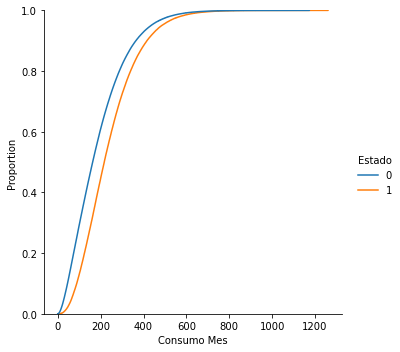

In [19]:
sns.displot(data, x="Consumo Mes", hue="Estado", kind="ecdf")

Se procede a segmentar por `Tipo Inmueble`:

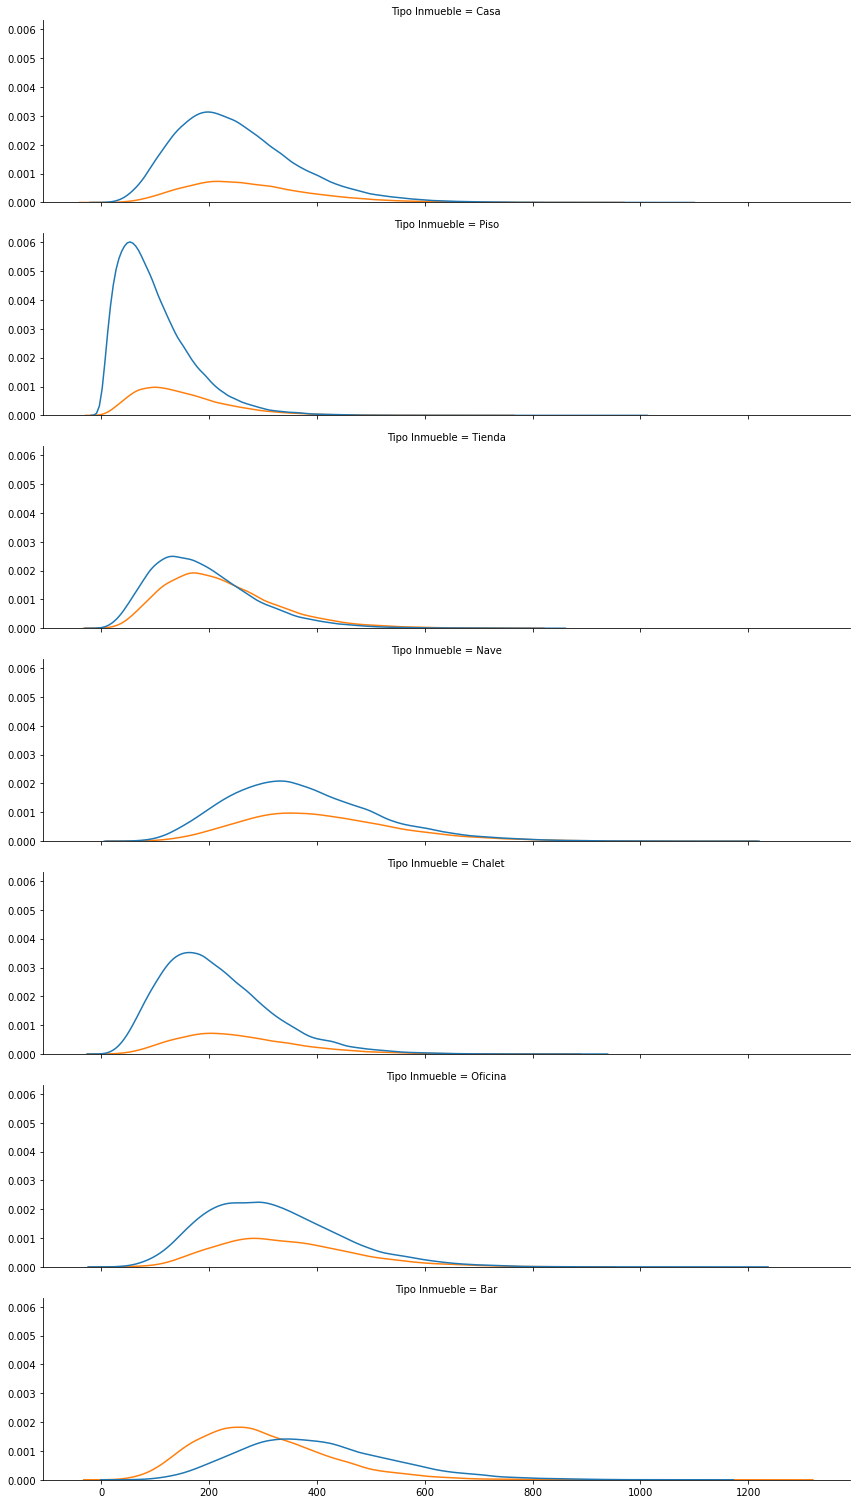

In [20]:
g = sns.FacetGrid(data, row="Tipo Inmueble", height=3, aspect=4)
g.map_dataframe(sns.kdeplot, x="Consumo Mes", hue = 'Estado')

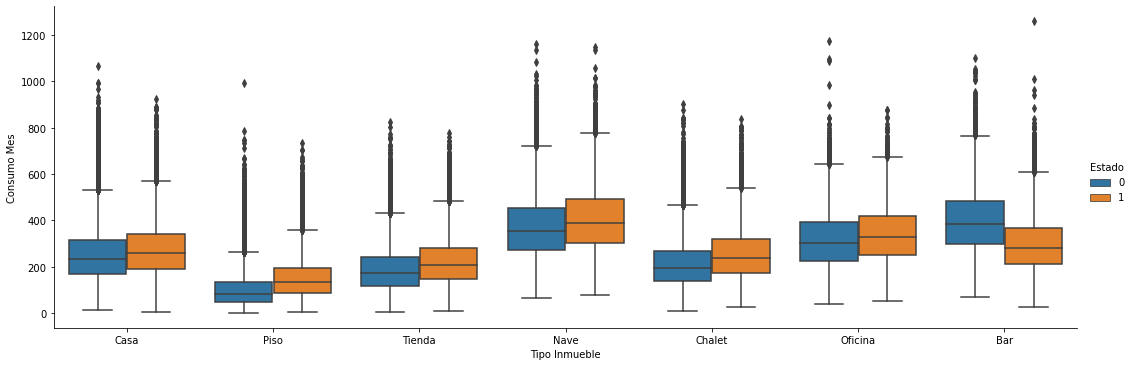

In [29]:
g = sns.catplot(x="Tipo Inmueble", y="Consumo Mes", 
                hue="Estado", data=data, kind="box",
                height=5, aspect=3);

En todos los tipos de inmueble se mantiene la regla general excepto en los bares, donde la función de distribución de las bajas refleja un menor consumo que en los clientes activos, lo que puede venir provocado por bajas como consecuencia del cese del negocio al tener escasa actividad.

<a id='Filtrado'></a>
### Filtrado de una comunidad para MVP

Se filtran los clientes de la Comunidad Valenciana para crear los primeros modelos, de forma que no sea necesario trabajar con todos los datos y ahorrar tiempos de ejecución en el proceso iterativo de mejoras.

In [64]:
provincias = ['Alicante', 'Valencia', 'Castellon']

data_filtered = data[data['Provincia'].isin(provincias)]
data_filtered.head()

,Fecha Alta,Cliente,Modelo Caldera,Provincia,Gender,Pais,Born Date,Tipo Propiedad,Situacion Laboral,Estado Civil,Ingresos,Pagos Anuales,Fecha Estado,Estado,Tipo Inmueble,Financiado,Precio Contado,Precio Total,Quejas,Incidencias,Consumo Mes
16,2014-01-01,17,Biasi,Alicante,Hombre,España,1973-05-19,Propiedad Total,Autonomo,Casado,2500,14,2016-09-14,1,Casa,Financiado,Promo 0 EUR,399,1,0,441.63
53,2014-01-01,54,Biasi,Alicante,Hombre,España,1976-05-08,Propiedad Total,Parado,Soltero,1200,14,2016-12-29,1,Piso,Financiado,Promo 0 EUR,399,0,0,152.57
83,2014-01-01,84,Biasi,Valencia,Hombre,España,1982-03-15,Propiedad Total,Trabajo Temporal,Soltero,800,14,2017-02-24,1,Casa,Financiado,0 - 100 EUR,399,1,0,288.73
102,2014-01-01,103,Biasi,Alicante,Hombre,España,1976-02-02,Propiedad Total,Autonomo,Casado,1500,12,2014-01-01,0,Casa,Financiado,Promo 0 EUR,399,1,0,103.97
109,2014-01-01,110,Biasi,Alicante,Mujer,España,1989-07-31,Propiedad Total,Parado,Soltero,1000,12,2017-03-11,1,Piso,Financiado,Promo 0 EUR,399,0,8,145.43


In [65]:
data_filtered.shape

(55227, 21)

In [66]:
data_filtered.to_excel('../data/portfolio_com_valencia.xlsx', index = False)